# Algoritmo para obtener imágenes y sus máscaras binarias

### Importación de librerías

In [48]:
import os
import matplotlib.pyplot as plt
import keras.utils as image
import math
import random
from keras.preprocessing.image import ImageDataGenerator
import time
import numpy as np
import cv2
from os.path import join, exists, isdir, splitext, basename


### Función para graficar imágenes de un directorio por filas y columnas

In [28]:
def plt_img_paths(dir_raiz, dir_img, num_img_por_fila, num_t_img_plt):
    
    DATA_A1 = join(dir_raiz, dir_img)
    lote_img = []
    if exists(DATA_A1):
        print(f"El directorio {DATA_A1} sí existe")
        for i, j in enumerate(os.listdir(DATA_A1)):
            if j.endswith((".jpg",".png",".jpeg")):
                DATA_A1_ = join(DATA_A1, j)
                img = image.load_img(DATA_A1_, target_size = (150,150))
                img = image.img_to_array(img)
                img /=255.0
                lote_img.append(img)
                
        N_img_plt = min(len(lote_img), num_t_img_plt)
        R_img_plt = random.sample(lote_img, N_img_plt)
        N_img_fila = math.ceil(N_img_plt/num_img_por_fila)
        
        fig, axs = plt.subplots(N_img_fila, num_img_por_fila, layout = "constrained", figsize = (13,6))
        
        for i, lote_img in enumerate(R_img_plt):
            fila = i//num_img_por_fila
            columna = i % num_img_por_fila
            if N_img_fila == 1:
                axs[columna].imshow(lote_img)
                axs[columna].axis("off")
                
            else:
                axs[fila, columna].imshow(lote_img)
                axs[fila, columna].axis("off")
                
        for i in range(N_img_plt, num_img_por_fila*N_img_fila):
            fila = i//num_img_por_fila
            columna = i % num_img_por_fila
            if N_img_fila == 1:
                axs[columna].axis("off")
                
            else:
                axs[fila, columna].axis("off")
    
    else:
        print(f"¡El directorio {DATA_A1} no existe!")
            

### Función para aumento de datos

In [45]:
def aumento_datos(carp_raiz, carp_entrada, carp_salida, n_img_gen):
    
    D_entrada = join(carp_raiz, carp_entrada)
    D_salida = join(carp_raiz, carp_salida)
    
    if exists(D_salida):
        print(f"¡El directorio {D_salida} sí existe!")
    if not exists(D_salida):
        os.makedirs(D_salida)
        print(f"¡El directorio {D_salida} se ha creado satisfactoriamente!")
        
    Transformaciones = ImageDataGenerator(
        
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
    
    for nom_archivo in os.listdir(D_entrada):
        if nom_archivo.endswith((".png",".jpg",".jpeg")):
            D_img_entrada = join(D_entrada, nom_archivo)
            img = image.load_img(D_img_entrada, target_size = (1280, 1280))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis = 0)
            
            img_transf = Transformaciones.flow(img, batch_size = 1)
            
            for i in range(n_img_gen):
                img_new = next(img_transf)[0].astype(np.uint8)
                img_new = image.array_to_img(img_new)
                img_new = img_new.convert('RGB')
                
                img_new.save(join(D_salida, f"{nom_archivo.split('.')[0]}_ag_{i}.{nom_archivo.split('.')[1]}"))
    
    print("¡Ha finalizado el proceso de aumento de datos!")
    print(f"Total de imágenes generadas: {len(os.listdir(D_entrada))*n_img_gen}.")

### Función para generar máscaras binarias

In [58]:
def generador_masc_binarias(carp_entrada, carp_salida_masc):
    
    if exists(carp_salida_masc):
        print(f"¡El directorio {carp_salida_masc} sí existe!")
    if not exists(carp_salida_masc):
        os.makedirs(carp_salida_masc)
        print(f"¡El directorio {carp_salida_masc} se ha creado satisfactoriamente!")
        
    for i in range(1):
        D_entrada = join (carp_entrada)
        list_img = os.listdir(D_entrada)
        for j in range(len(list_img)):
            dir_img = join(D_entrada, list_img[j])
            img = image.load_img(dir_img)
            img = image.img_to_array(img)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray /= 255.0
            _, Thr = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
            img_nom = splitext(basename(dir_img))[0]
            D_salida = join(os.getcwd(),carp_salida_masc)
            cv2.imwrite(join(D_salida,f"{img_nom}_mask.png"),Thr)
    print("¡Las máscaras binarias se han generado exitosamente!")        

### Función para graficar varias imágenes por clases de un directorio raíz

In [88]:
def plot_random_img_class(D_raiz, clases, n_muestras):
    
    figura = plt.figure(figsize = (10,5))
    figura.suptitle("Muestras aleatorias por cada directorio", horizontalalignment = "center", y = 0.95, weight = "bold", fontsize = 13)
    columnas = n_muestras
    filas = len(clases)
    
    for i, nom_clase in enumerate(clases):
        d_clase = join(D_raiz, nom_clase)
        for j in range(1, n_muestras + 1):
            figura.add_subplot(filas, columnas, i * n_muestras + j)
            plt.axis("off")
            
            if j == 1:
                plt.text(0.0, 0.5, nom_clase.replace(" ","\n"), fontsize = 12, wrap = True)
                continue
            
            dir_img_random = join(d_clase, random.choice(os.listdir(d_clase)))
            img_random = image.load_img(dir_img_random, target_size =(150,150))
            img_random = (image.img_to_array(img_random))
            img_random /= 255.0
            plt.imshow(img_random)
    plt.show()

El directorio D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1/Data_random sí existe


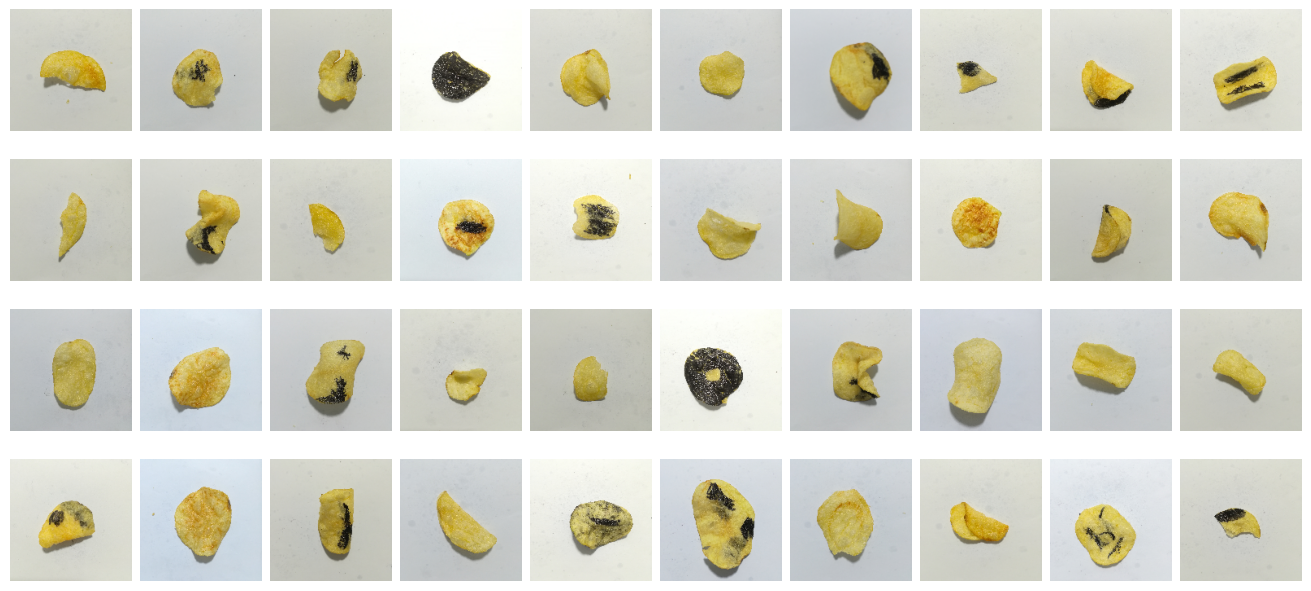

In [90]:
root_path="D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/"
IMG_path= "DATA_A1/Data_random"
num_img_plot = 40
num_img_row = 10
val_plot = (root_path, IMG_path, num_img_row, num_img_plot)

plt_img_paths(val_plot[0],val_plot[1],val_plot[2],val_plot[3])

In [91]:
Carp_Raiz = 'D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1'
Carp_img_ent = 'Data_random'
Carp_img_sal = 'Data_Augmentation'
N_img_gen_x_img = 8
Variables =(Carp_Raiz,Carp_img_ent,Carp_img_sal,N_img_gen_x_img)

aumento_datos(Variables[0],Variables[1],Variables[2],Variables[3])

¡El directorio D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1\Data_Augmentation se ha creado satisfactoriamente!
¡Ha finalizado el proceso de aumento de datos!
Total de imágenes generadas: 320.


El directorio D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1/Data_Augmentation sí existe


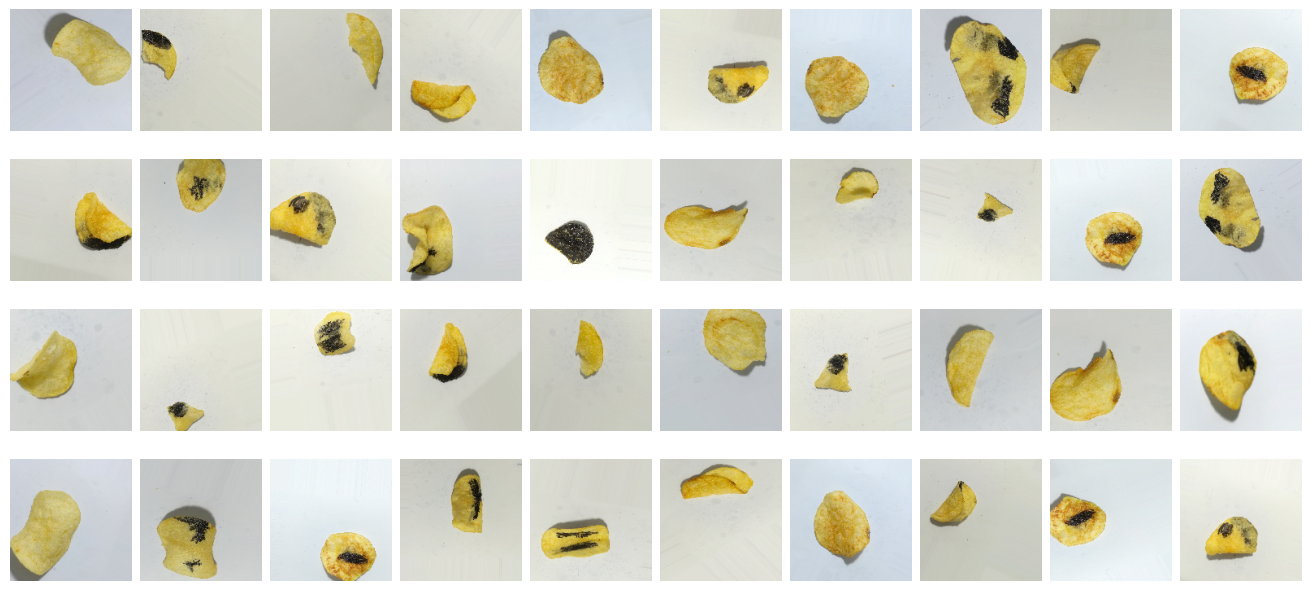

In [93]:
root_path="D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/"
IMG_path= "DATA_A1/Data_Augmentation"
num_img_plot = 40
num_img_row = 10
val_plot = (root_path, IMG_path, num_img_row, num_img_plot)

plt_img_paths(val_plot[0],val_plot[1],val_plot[2],val_plot[3])

In [92]:
output_dir_mask= "D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1/Data_mask"
path_aux= "D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1/Data_Nground"
Variables =(path_aux,output_dir_mask)
generador_masc_binarias(Variables[0],Variables[1])

¡El directorio D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1/Data_mask se ha creado satisfactoriamente!
¡Las máscaras binarias se han generado exitosamente!


El directorio D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/DATA_A1/Data_Nground sí existe


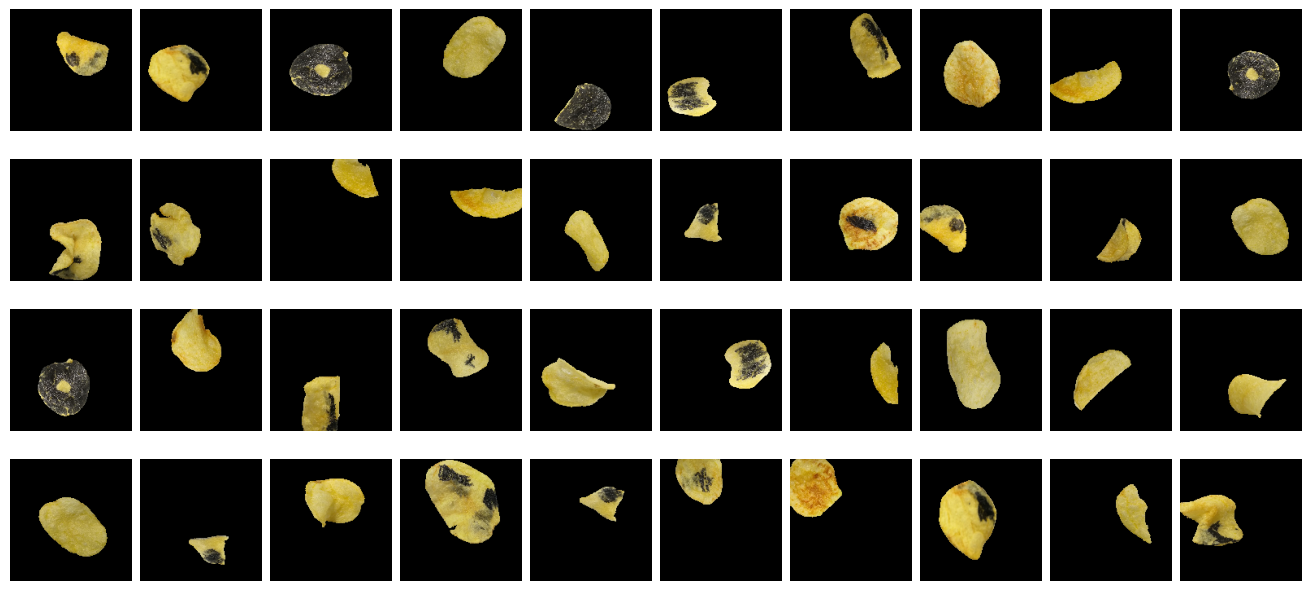

In [94]:
root_path="D:/DETECCION_DE_DEFECTOS/ALGORITHMS_TESIS/ALG_1/"
IMG_path= "DATA_A1/Data_Nground"
num_img_plot = 40
num_img_row = 10
val_plot = (root_path, IMG_path, num_img_row, num_img_plot)

plt_img_paths(val_plot[0],val_plot[1],val_plot[2],val_plot[3])

# Generar máscaras

# Visualizar grupo de datos

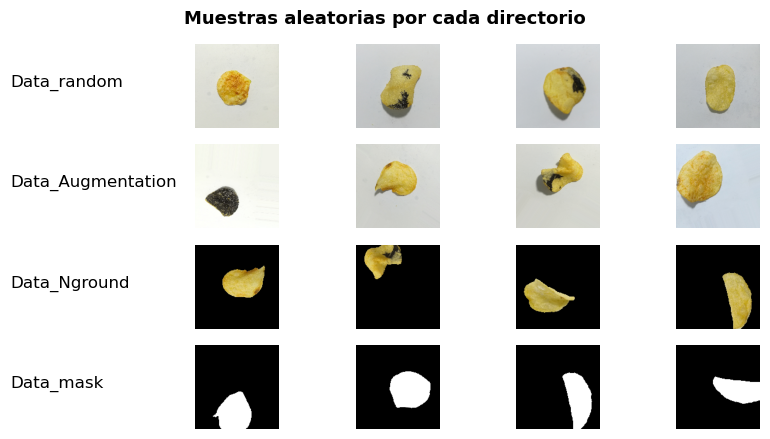

In [96]:
num_samples = 5
path = 'DATA_A1'
class_names = ['Data_random','Data_Augmentation', 'Data_Nground','Data_mask']  # Nombres de clases en la carpeta General
plot_random_img_class(path, class_names,num_samples)